**Assignment Title:** End-to-End ANN Model Implementation and Analysis
Instructions:

1. Follow the tasks step by step in this notebook.

2. Write your code in the provided cells only.

3. Submit the following:

      Completed .ipynb file

**A report (.pdf or .docx) with answers to the analysis questions provided at the end.**

✅ Task 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

✅ Task 2: Load Dataset (Use from sklearn.datasets or any open dataset)

In [ ]:
df = pd.read_csv("C:\\Users\\talkt\\Downloads\\Car_Purchasing_Data.csv", encoding='ISO-8859-1')
df.head(2)


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566


In [ ]:
df.tail(2)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


✅ Task 3: Perform Exploratory Data Analysis (EDA)
1. Show basic info (shape, columns, datatypes)
2. Describe data
3. Use visualizations (histograms, boxplots, heatmaps, pairplots etc.)

Identify class imbalance if any

In [ ]:
df.shape

(500, 9)

In [ ]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


<Axes: >

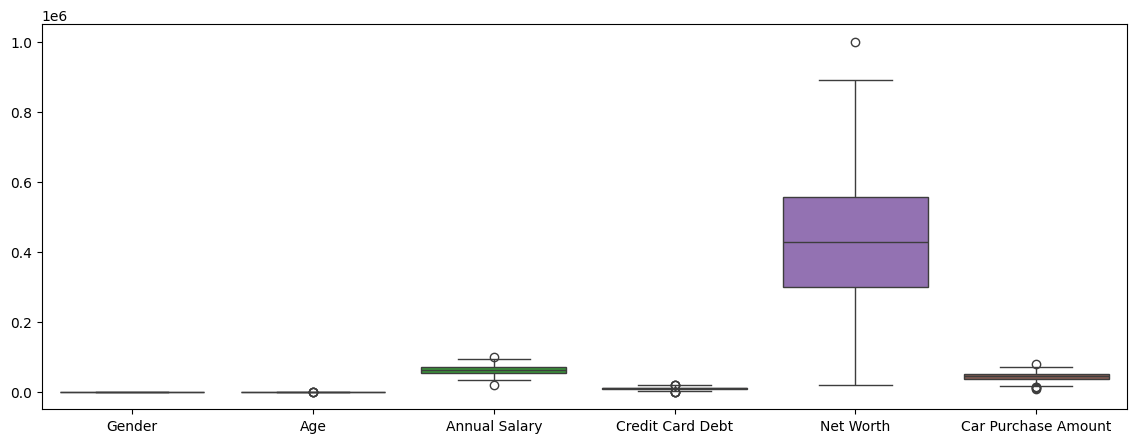

In [ ]:
plt.figure(figsize=(14, 5))
sns.boxplot(df)

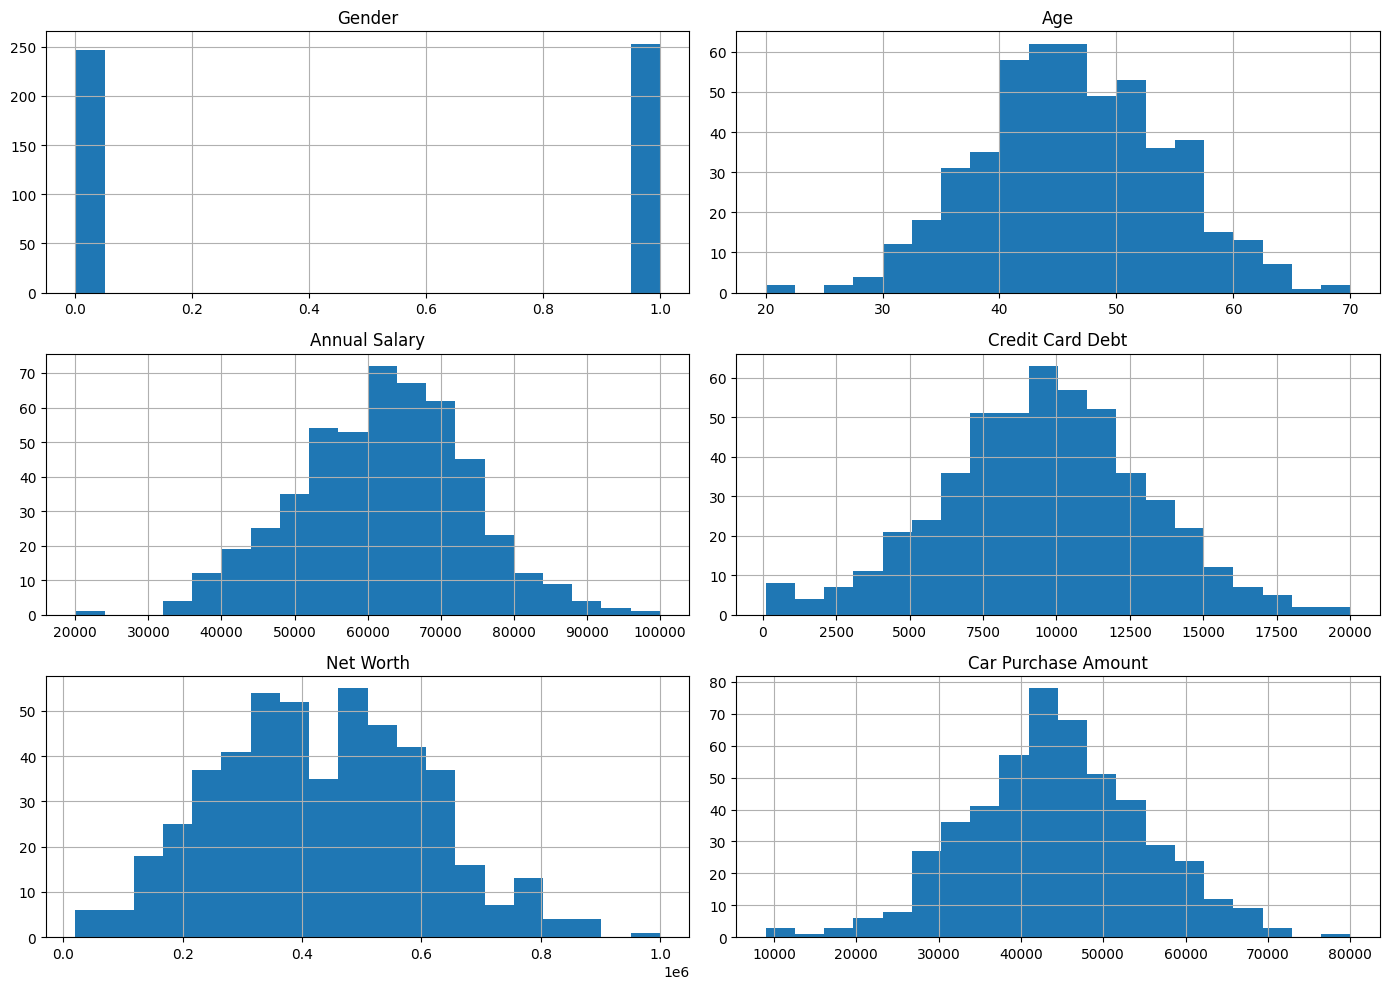

In [ ]:
df.hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

df = remove_outliers(df, ['Age','Credit Card Debt','Annual Salary','Net Worth','Car Purchase Amount'])

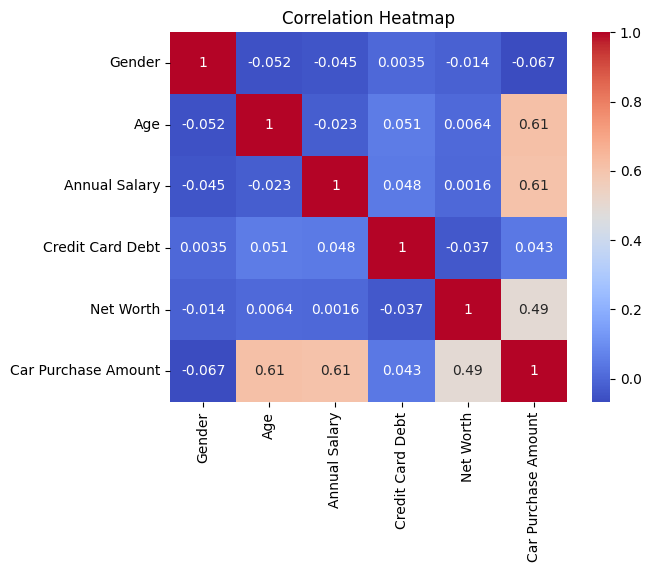

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.shape

(484, 9)

✅ Task 4: Feature Engineering
1. Handle missing values if any
2. Encode categorical variables if any
3. Create or remove irrelevant features

In [ ]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)


✅ Task 5: Feature Scaling / Normalization
1. StandardScaler / MinMaxScaler

✅ Task 6: Split Data into Training and Testing Sets (80/20 or 70/30)

In [ ]:

x = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
y = df['Car Purchase Amount']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


✅ Task 7: Define the ANN Model (Sequential API - Keras)
1. Design architecture (input, hidden, output layers)
2. Use appropriate activation functions




In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

c:\Users\talkt\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Task 8: Compile the Model
* Select optimizer, loss function, and evaluation metrics

In [ ]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

✅ Task 9: Train the Model
* Use model.fit()
* Track performance using training history

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)
history

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2154238464.0000 - mae: 45190.6289 - val_loss: 1910089088.0000 - val_mae: 42507.3008
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2154199040.0000 - mae: 45190.2070 - val_loss: 1910047232.0000 - val_mae: 42506.8125
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2154146048.0000 - mae: 45189.6172 - val_loss: 1909986816.0000 - val_mae: 42506.1094
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2154067456.0000 - mae: 45188.7617 - val_loss: 1909901824.0000 - val_mae: 42505.1289
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2153956096.0000 - mae: 45187.5547 - val_loss: 1909778432.0000 - val_mae: 42503.7070
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2153792768.0000 - mae: 45185.7930 - val_loss: 1909599744.0000 - val_mae: 42501.6406
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2153554688.0000 - mae: 45183.2070 - val_loss: 1909342976.0000 - val_mae: 42498.6758
Epoch 

✅ Task 10: Visualize Model Performance
* Plot loss and accuracy curves for training and validation

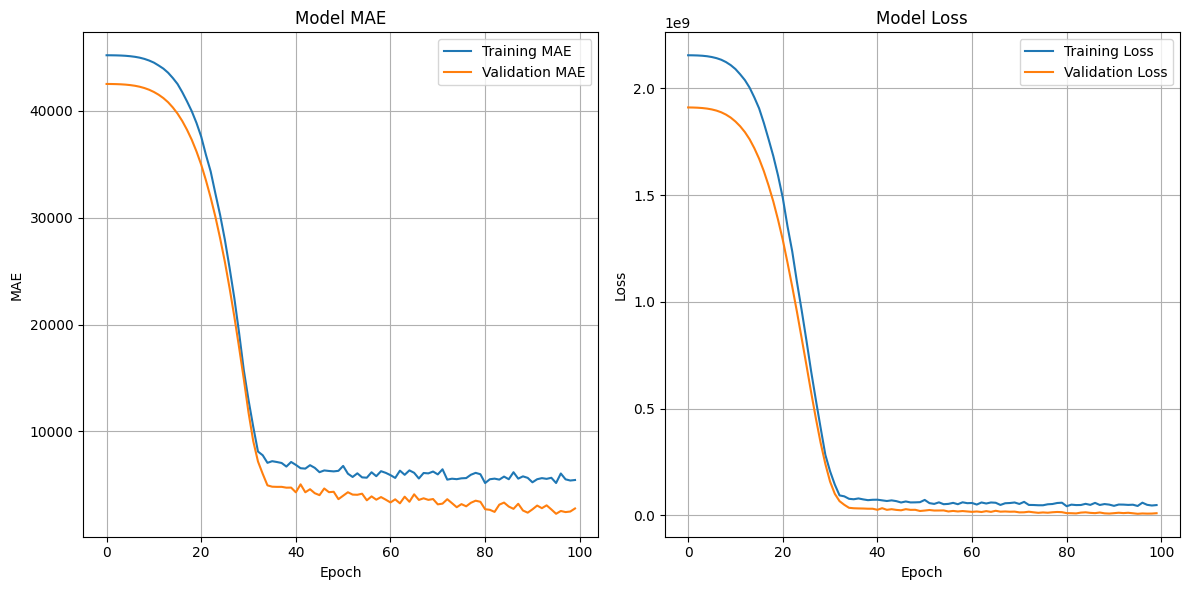

In [ ]:
plt.figure(figsize=(12, 6)),
plt.subplot(1, 2, 1) ,
plt.plot(history.history['mae'], label='Training MAE'),
plt.plot(history.history['val_mae'], label='Validation MAE'),
plt.title('Model MAE'),
plt.xlabel('Epoch'),
plt.ylabel('MAE'),
plt.legend(),
plt.grid(True),

plt.subplot(1, 2, 2) ,
plt.plot(history.history['loss'], label='Training Loss'),
plt.plot(history.history['val_loss'], label='Validation Loss'),
plt.title('Model Loss'),
plt.xlabel('Epoch'),
plt.ylabel('Loss'),
plt.legend(),
plt.grid(True),
plt.tight_layout(),
plt.show()

✅ Task 11: Evaluate Model on Test Data
* Accuracy, loss
* Predict test set

In [ ]:
loss, mae = model.evaluate(x_test, y_test)
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26874748.0000 - mae: 4396.9468 
Test Loss (MSE): 26874748.0
Test MAE: 4396.94677734375


✅ Task 12: Confusion Matrix and Classification Report
* Use sklearn metrics to analyze performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test).flatten()
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
MAE: 4396.947435988869
MSE: 26874748.915890485
RMSE: 5184.086121573453
R2 Score: 0.6973968902432588


✅ Task 13: Hyperparameter Tuning (Try any of the following)
* Vary batch size, epochs, optimizers
* Use Keras Tuner or manual tuning

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # No activation for regression
])

c:\Users\talkt\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=25)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2154192128.0000 - mae: 45190.1289 - val_loss: 1909967488.0000 - val_mae: 42505.8672
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2153905408.0000 - mae: 45187.0000 - val_loss: 1909565824.0000 - val_mae: 42501.1680
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2153226752.0000 - mae: 45179.7031 - val_loss: 1908684160.0000 - val_mae: 42490.9414
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2151917824.0000 - mae: 45165.3242 - val_loss: 1907133696.0000 - val_mae: 42473.0352
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2149616128.0000 - mae: 45140.4023 - val_loss: 1904585344.0000 - val_mae: 42443.8047
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2145905408.0000 - mae: 45100.8672 - val_loss: 1900657280.0000 - val_mae: 42398.9414
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2140650368.0000 - mae: 45044.5469 - val_loss: 1895090432.0000 - val_mae: 423

In [ ]:
loss, mae = model.evaluate(x_test, y_test)
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9617599.0000 - mae: 2695.0701 
Test Loss (MSE): 9617599.0
Test MAE: 2695.070068359375


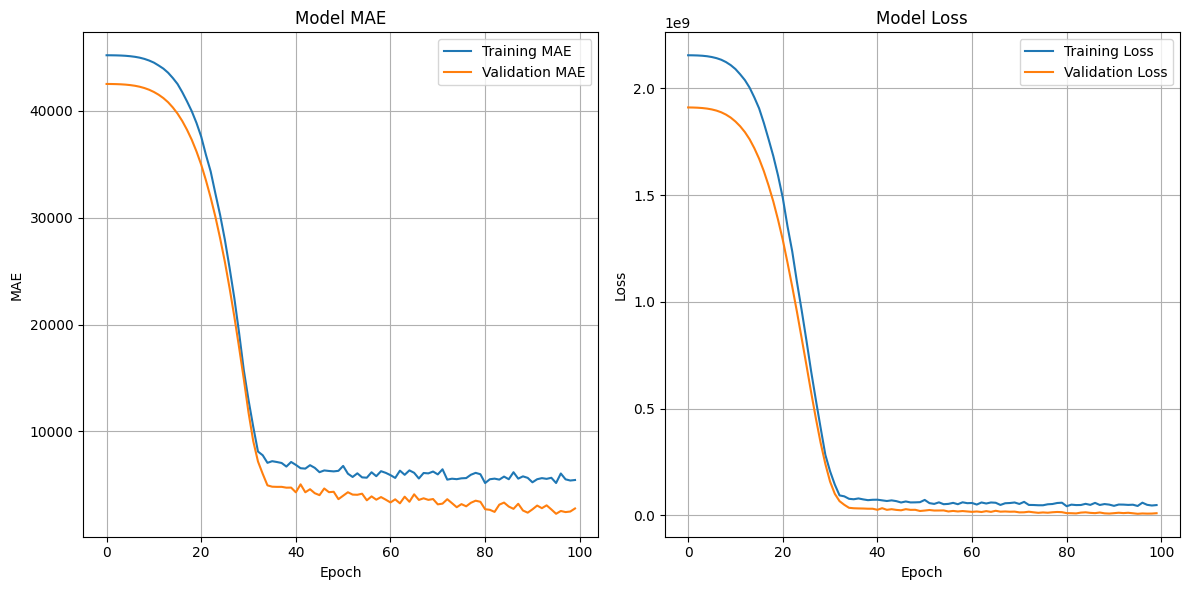

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

✅ Task 14: Save and Load the Model (Optional)

📄 Report Questions (To be submitted separately)
* Dataset Selection: What dataset did you choose? Describe its purpose and target.
* EDA Findings: What key insights did you gain during EDA?
* Feature Engineering: What transformations did you apply? Why?
* ANN Architecture: List number of layers, neurons, activation functions.
* Performance Summary: What were the final accuracy and loss?
* Confusion Matrix Analysis: What did it reveal about model behavior?
* Hyperparameter Tuning: What parameters did you change and what was the result?
* Improvement Ideas: Suggest one way to improve performance.
* Overfitting/Underfitting: Did you face it? How did you address it?

